# Exploration_1
## 1.1 프로젝트 설정
### 1.11 라이브러리 및 모듈 임포트

In [1]:
import tensorflow as tf, tensorflow_datasets as tfds, keras
from keras import layers, models
import models_base, models_top, utils

print(tf.__version__)
print(tfds.__version__)

2025-01-30 09:49:56.108890: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-30 09:49:56.118821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738198196.129321   24155 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738198196.132346   24155 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 09:49:56.143993: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

2.18.0
4.9.7


### 1.12 데이터셋 다운로드 및 확인

I0000 00:00:1738198202.848217   24155 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-01-30 09:50:03.274877: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-30 09:50:03.295916: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/home/technocracy90/keras/exp_1/data/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dty

2025-01-30 09:50:03.580994: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


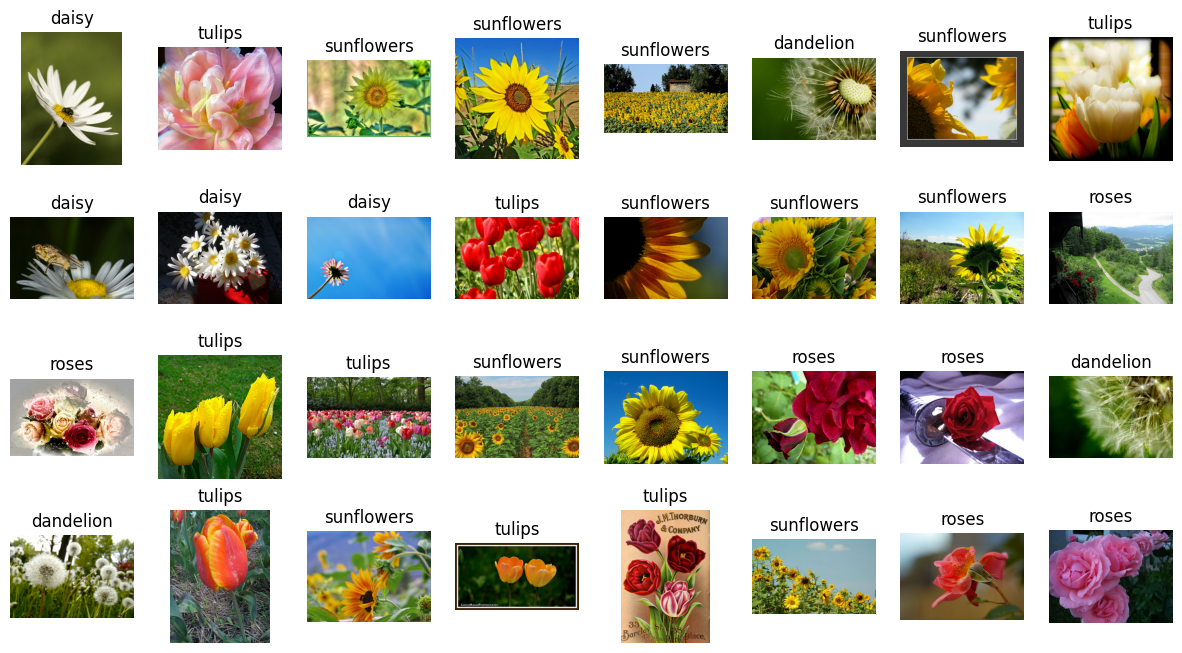

In [2]:
# Load the dataset
(raw_train, raw_validation, raw_test), dataset_info = tfds.load(
    name='tf_flowers',
    shuffle_files=True,
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='~/keras/exp_1/data/',
    download=True,
    with_info=True,
    as_supervised=True,
)

# Print the dataset info
print(dataset_info)

# Display the labels of first 5 examples
for a, b in raw_train.take(5):
    print(b)

# Display the first 32 images
utils.example_display(dataset_info, raw_train, num_examples=32, is_raw = True)

### 1.13 데이터셋 전처리 및 적재

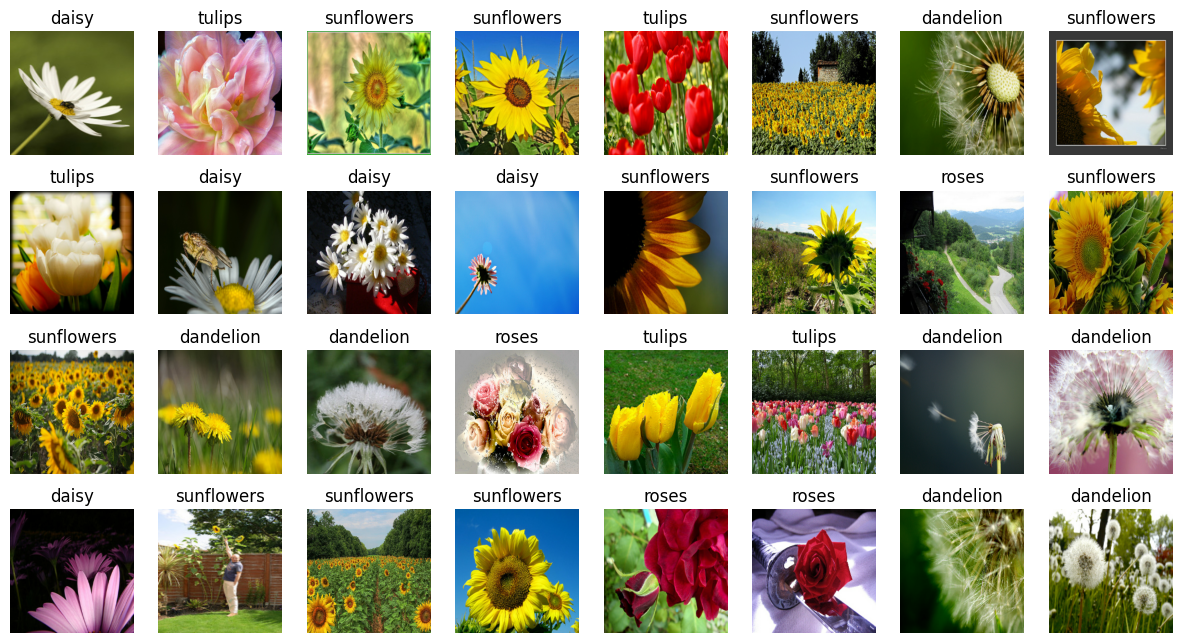

In [3]:
train = raw_train.map(lambda x, y: utils.resize_and_rescale(x, y, size=(224, 224)))
validation = raw_validation.map(lambda x, y: utils.resize_and_rescale(x, y, size=(224, 224)))
test = raw_test.map(lambda x, y: utils.resize_and_rescale(x, y, size=(224, 224)))

utils.example_display(dataset_info, train, num_examples=32, is_raw = False)

train_batch, val_batch, test_batch = utils.get_batches(train, validation, test, batch_size=128)

## 1.2 모델 설정
### 1.21 basic_1 모델

가장 간단한 모델을 설정하기 위해 base 모델을 simple1, top 모델도 simple1으로 설정

#### 1.211 basic_1 모델 설정 및 학습

In [4]:
def basic_model_1(input_shape = (224, 224, 3)):
    inputs = keras.Input(shape=input_shape)
    features = models_base.base_simple1()(inputs)
    features = models_top.simple1()(features)
    output = layers.Dense(5, activation='softmax')(features)
    
    model = keras.Model(inputs=inputs, outputs=output)
    
    return model

basic = basic_model_1()
basic.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28, 64)     │        23,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_simple1 (Sequential)      │ (None, 256)            │       164,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,477 (740.14 KB)

 Trainable params: 189,477 (740.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1738197335.675200    9151 service.cc:148] XLA service 0x7fb49c009c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738197335.676853    9151 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-30 09:35:35.713806: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738197335.800737    9151 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-01-30 09:35:36.286409: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_529', 4 bytes spill stores, 4 bytes spill loads

2025-01-30 09:35:36.877804: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_471', 360 bytes sp

 4/23 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2030 - loss: 1.6059

I0000 00:00:1738197341.941628    9151 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2600 - loss: 1.5609

2025-01-30 09:35:43.687920: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_471', 168 bytes spill stores, 168 bytes spill loads

2025-01-30 09:35:44.297678: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_471', 176 bytes spill stores, 176 bytes spill loads

2025-01-30 09:35:44.775462: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_851', 56 bytes spill stores, 56 bytes spill loads



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.2627 - loss: 1.5579

2025-01-30 09:35:51.556980: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98_0', 228 bytes spill stores, 228 bytes spill loads

2025-01-30 09:35:51.720992: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98_0', 768 bytes spill stores, 720 bytes spill loads

2025-01-30 09:35:54.155301: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 176 bytes spill stores, 176 bytes spill loads

2025-01-30 09:35:54.182688: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 168 bytes spill stores, 168 bytes spill loads

2025-01-30 09:35:54.362074: I external/local_xla/xla/str

23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 631ms/step - accuracy: 0.2652 - loss: 1.5551 - val_accuracy: 0.4360 - val_loss: 1.3278
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4337 - loss: 1.2686 - val_accuracy: 0.4959 - val_loss: 1.2116
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4797 - loss: 1.2078 - val_accuracy: 0.5613 - val_loss: 1.1413
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4904 - loss: 1.1722 - val_accuracy: 0.5531 - val_loss: 1.1125
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5142 - loss: 1.1393 - val_accuracy: 0.5749 - val_loss: 1.0720
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5344 - loss: 1.1121 - val_accuracy: 0.5722 - val_loss: 1.0661
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5422 - loss: 1.0963 - val_accuracy: 0.5940 - val_loss: 1.0379
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5391 - loss: 1.0812 - val_accuracy: 0.5940 - val

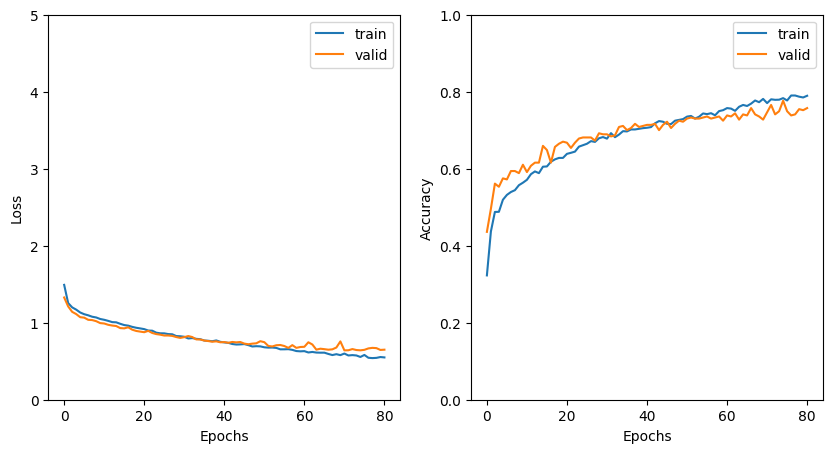

In [5]:
basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

basic_history = basic.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

#### 1.212 basic_1 모델 리뷰

1. train accuracy가 느리게 상승함: 모델 크기를 키울 필요성 있음
2. train accuracy가 충분히 커지기 전에 val loss가 과적합에 이름

### 1.22 basic_2 모델

모델 크기를 키우기 위해 basic_1 모델의 base 모델을 simple2로 교체

#### 1.221 basic_2 모델 설정 및 학습

In [4]:
def basic_model_2(input_shape = (224, 224, 3)):
    inputs = keras.Input(shape=input_shape)
    features = models_base.base_simple2(input_shape=input_shape)(inputs)
    features = models_top.simple1()(features)
    output = layers.Dense(5, activation='softmax')(features)
    
    model = keras.Model(inputs=inputs, outputs=output)
    
    return model

basic = basic_model_2()
basic.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_simple2 (Functional)       │ (None, 7, 7, 256)      │       392,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ top_simple1 (Sequential)        │ (None, 256)            │       262,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,805 (2.51 MB)

 Trainable params: 656,805 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1738198232.185023   24305 service.cc:148] XLA service 0x7fbcf80142c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738198232.185122   24305 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-30 09:50:32.217834: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738198232.336127   24305 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-01-30 09:50:34.318404: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_843_0', 312 bytes spill stores, 268 bytes spill loads

2025-01-30 09:50:34.538005: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_624', 4 byte

 2/23 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.1953 - loss: 1.6139

I0000 00:00:1738198242.132291   24305 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2521 - loss: 1.5898

2025-01-30 09:50:44.080957: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_272', 8 bytes spill stores, 8 bytes spill loads

2025-01-30 09:50:44.117620: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_272', 4 bytes spill stores, 4 bytes spill loads

2025-01-30 09:50:44.223007: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_272_0', 168 bytes spill stores, 168 bytes spill loads

2025-01-30 09:50:44.374390: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_843_0', 80 bytes spill stores, 80 bytes spill loads

2025-01-30 09:50:44.687197: I external/local_xla/xla/stream_ex

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.2546 - loss: 1.5873

2025-01-30 09:50:53.352372: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130_0', 228 bytes spill stores, 228 bytes spill loads

2025-01-30 09:50:53.614127: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130_0', 768 bytes spill stores, 720 bytes spill loads

2025-01-30 09:50:53.701555: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123', 4 bytes spill stores, 4 bytes spill loads

2025-01-30 09:50:54.481129: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123_0', 168 bytes spill stores, 168 bytes spill loads

2025-01-30 09:50:54.601496: I external/local_xla/xla/s

23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 646ms/step - accuracy: 0.2569 - loss: 1.5850 - val_accuracy: 0.4387 - val_loss: 1.3438
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4264 - loss: 1.3144 - val_accuracy: 0.4278 - val_loss: 1.3596
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4464 - loss: 1.2514 - val_accuracy: 0.5477 - val_loss: 1.1328
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4773 - loss: 1.1746 - val_accuracy: 0.5395 - val_loss: 1.0958
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4965 - loss: 1.1397 - val_accuracy: 0.6076 - val_loss: 1.0403
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5468 - loss: 1.0713 - val_accuracy: 0.5858 - val_loss: 1.0234
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5637 - loss: 1.0536 - val_accuracy: 0.6158 - val_loss: 0.9899
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5773 - loss: 1.0166 - val_accuracy: 0.6240 - val

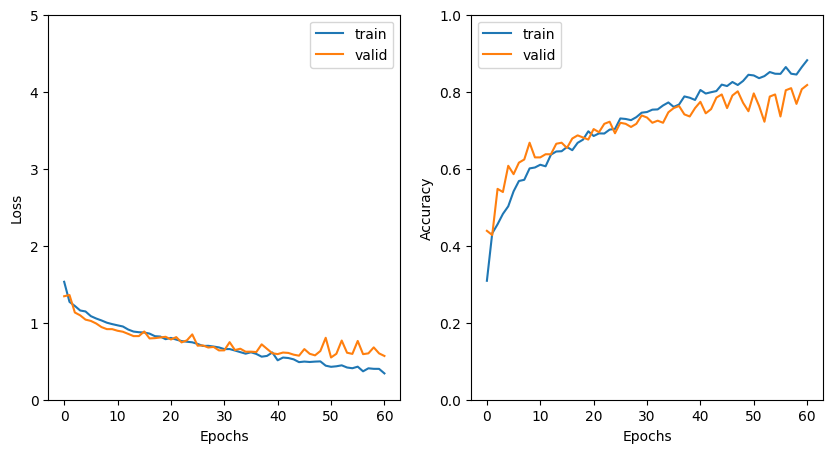

In [5]:
basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

basic_history = basic.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

#### 1.222 basic_2 모델 리뷰

1. base 모델 확장의 효과 확인: train_acc이 0.79에서 0.9로 크게 상승
2. 여전히 train_acc이 충분히 높아지기 전에 과적합 발생

### 1.23 basic_3 모델

1. data augmentation을 통해 과적합 시점 늦추기 시도

#### 1.231 basic_3 모델 설정 및 학습습

In [14]:
def basic_model_3(input_shape = (224, 224, 3)):
    inputs = keras.Input(shape=input_shape)
    features = utils.image_preprocessing_v1()(inputs)
    features = models_base.base_simple2(input_shape=input_shape)(features)
    features = models_top.simple1()(features)
    output = layers.Dense(5, activation='softmax')(features)
    
    model = keras.Model(inputs=inputs, outputs=output)
    
    return model

basic = basic_model_3()
basic.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 224, 224, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_simple2 (Functional)       │ (None, 7, 7, 256)      │       392,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ top_simple1 (Sequential)        │ (None, 256)            │       262,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,812 (2.51 MB)

 Trainable params: 656,805 (2.51 MB)

 Non-trainable params: 7 (32.00 B)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.2505 - loss: 1.5590 - val_accuracy: 0.4169 - val_loss: 1.2555
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4380 - loss: 1.2623 - val_accuracy: 0.4986 - val_loss: 1.2378
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ -1s -37775us/step - accuracy: 0.4682 - loss: 1.2136 - val_accuracy: 0.4905 - val_loss: 1.1093
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4961 - loss: 1.1647 - val_accuracy: 0.5804 - val_loss: 1.0585
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5329 - loss: 1.1273 - val_accuracy: 0.6158 - val_loss: 0.9798
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5528 - loss: 1.0532 - val_accuracy: 0.6049 - val_loss: 0.9440
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5655 - loss: 1.0325 - val_accuracy: 0.6049 - val_loss: 0.9667
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5907 - loss: 1.0331 - val_accura

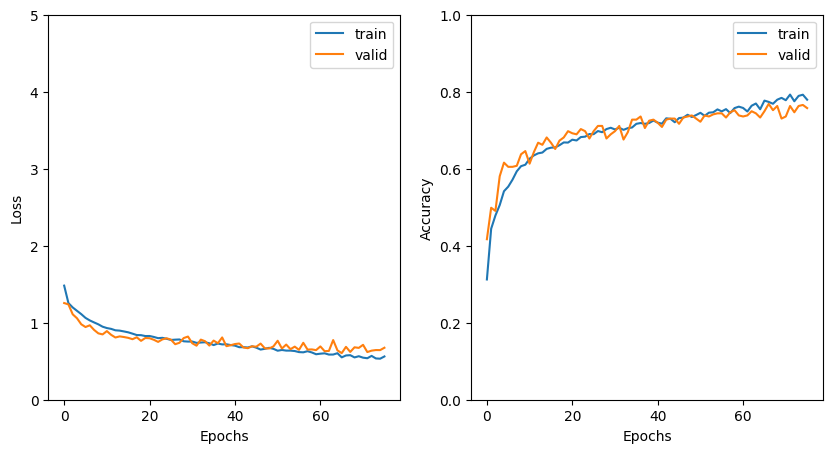

In [15]:
basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

basic_history = basic.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

#### 1.232 basic_3 모델 리뷰

1. 과적합 시기 늦춰짐: data augmentation의 효과 확인
2. 훈련 효과 감소: 모델 최적화 성능을 높이기 위해 규모 확대 등 필요
3. 데이터 EDA 필요요

In [ ]:
def eV2L_simple1(input_shape, learning_rate): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape = input_shape)
    
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.EV2L(input_shape)(inputs, training=False)
    x = models_top.simple1()(x)

    outputs = layers.Dense(5, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='sparse_categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                   metrics=['accuracy']) 
    
    return model

model = eV2L_simple1((224, 224, 3), 1e-3)

model_history = model.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(model_history)
utils.plot_prediction(model, test, batch_size=64)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.2536 - loss: 1.5906 - val_accuracy: 0.4360 - val_loss: 1.5180
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.2988 - loss: 1.5396 - val_accuracy: 0.3515 - val_loss: 1.4431
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.3556 - loss: 1.4805 - val_accuracy: 0.5095 - val_loss: 1.3615
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - accuracy: 0.3700 - loss: 1.4351 - val_accuracy: 0.5041 - val_loss: 1.3212
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - accuracy: 0.3755 - loss: 1.4212 - val_accuracy: 0.5286 - val_loss: 1.3032
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - accuracy: 0.3851 - loss: 1.4052 - val_accuracy: 0.4768 - val_loss: 1.2858
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.3955 - loss: 1.3796 - val_accuracy: 0.5395 - val_loss: 1.2695
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - accuracy: 0.4095 - loss: 1.3852 - val_accura